# Módulo #1 - Estadística

### Exploratory Data Analysis - Base de Vinos 🍷

In [87]:
# Importando librerías
import pandas as pd
import numpy as np


**Importando una base de datos**

In [75]:
# Descargando la base de datos
file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/winequalityN.csv"
df = pd.read_csv(file_name)
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0000,0.2700,0.3600,20.7000,0.0450,45.0000,170.0000,1.0010,3.0000,0.4500,8.8000,6
1,white,6.3000,0.3000,0.3400,1.6000,0.0490,14.0000,132.0000,0.9940,3.3000,0.4900,9.5000,6
2,white,8.1000,0.2800,0.4000,6.9000,0.0500,30.0000,97.0000,0.9951,3.2600,0.4400,10.1000,6
3,white,7.2000,0.2300,0.3200,8.5000,0.0580,47.0000,186.0000,0.9956,3.1900,0.4000,9.9000,6
4,white,7.2000,0.2300,0.3200,8.5000,0.0580,47.0000,186.0000,0.9956,3.1900,0.4000,9.9000,6


In [90]:
# Explorando características de la base de datos (Dtype) (en una sola función de pandas)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [92]:
# Observaciones sin valor en 'fixed acidity'
df["fixed acidity"][df["fixed acidity"].isna()].shape

(10,)

In [96]:
# Cuántas observaciones hay por arriba de su mediana en 'fixed acidity'
df["fixed acidity"][df["fixed acidity"]>df["fixed acidity"].median()].shape

(3025,)

In [97]:
# Descripción estadística de las variables numéricas (mean, std, min, max, quartiles)
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,"6,487.0000","6,489.0000","6,494.0000","6,495.0000","6,495.0000","6,497.0000","6,497.0000","6,497.0000","6,488.0000","6,493.0000","6,497.0000","6,497.0000"
mean,7.2166,0.3397,0.3187,5.4443,0.0560,30.5253,115.7446,0.9947,3.2184,0.5312,10.4918,5.8184
std,1.2967,0.1646,0.1453,4.7581,0.0350,17.7494,56.5219,0.0030,0.1607,0.1488,1.1927,0.8733
min,3.8000,0.0800,0.0000,0.6000,0.0090,1.0000,6.0000,0.9871,2.7200,0.2200,8.0000,3.0000
25%,6.4000,0.2300,0.2500,1.8000,0.0380,17.0000,77.0000,0.9923,3.1100,0.4300,9.5000,5.0000
50%,7.0000,0.2900,0.3100,3.0000,0.0470,29.0000,118.0000,0.9949,3.2100,0.5100,10.3000,6.0000
75%,7.7000,0.4000,0.3900,8.1000,0.0650,41.0000,156.0000,0.9970,3.3200,0.6000,11.3000,6.0000
max,15.9000,1.5800,1.6600,65.8000,0.6110,289.0000,440.0000,1.0390,4.0100,2.0000,14.9000,9.0000


In [98]:
# Slicing dataframes con 'loc' de 25% al 75%
df.describe().loc['25%':'75%',]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
25%,6.4000,0.2300,0.2500,1.8000,0.0380,17.0000,77.0000,0.9923,3.1100,0.4300,9.5000,5.0000
50%,7.0000,0.2900,0.3100,3.0000,0.0470,29.0000,118.0000,0.9949,3.2100,0.5100,10.3000,6.0000
75%,7.7000,0.4000,0.3900,8.1000,0.0650,41.0000,156.0000,0.9970,3.3200,0.6000,11.3000,6.0000


In [116]:
# Cuántos vinos hay de cada tipo con al menos 10% de alcohol?
pd.DataFrame(df[df['alcohol']>=10]['type'].value_counts()).reset_index()

,index,type
0,white,2975
1,red,919


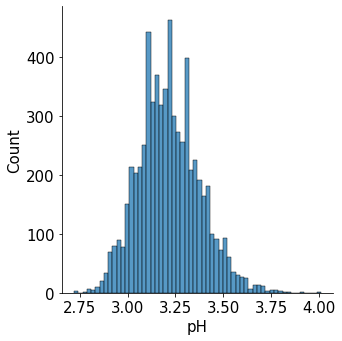

In [119]:
# Distribución del pH (seaborn)
import seaborn as sns
data = df["pH"]
sns.displot(data)

In [124]:
# Por un punto del final, y una buena extra en el examen teórico...
# Creando variables categóricas - "Quality" arriba de 6 es "Bueno", por debajo es "Regular/Malo"
df['calificación'] = df['quality'].apply(lambda x: 'Bueno' if x>=6 else 'Regular/Malo')
df.tail(3)


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,calificación
6494,red,6.3000,0.5100,0.1300,2.3000,0.0760,29.0000,40.0000,0.9957,3.4200,0.7500,11.0000,6,Bueno
6495,red,5.9000,0.6450,0.1200,2.0000,0.0750,32.0000,44.0000,0.9955,3.5700,0.7100,10.2000,5,Regular/Malo
6496,red,6.0000,0.3100,0.4700,3.6000,0.0670,18.0000,42.0000,0.9955,3.3900,0.6600,11.0000,6,Bueno


In [125]:
def rating_function(x):
    if x >= 6:
        return 'Bueno'
    else:
        return 'Regular/Malo'

In [127]:
df['calificación_2'] = df['quality'].apply(rating_function)
df.tail(3)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,calificación,calificación_2
6494,red,6.3000,0.5100,0.1300,2.3000,0.0760,29.0000,40.0000,0.9957,3.4200,0.7500,11.0000,6,Bueno,Bueno
6495,red,5.9000,0.6450,0.1200,2.0000,0.0750,32.0000,44.0000,0.9955,3.5700,0.7100,10.2000,5,Regular/Malo,Regular/Malo
6496,red,6.0000,0.3100,0.4700,3.6000,0.0670,18.0000,42.0000,0.9955,3.3900,0.6600,11.0000,6,Bueno,Bueno


In [128]:
df['fixed acidity'].apply(rating_function)

0              Bueno
1              Bueno
2              Bueno
3              Bueno
4              Bueno
            ...     
6492           Bueno
6493    Regular/Malo
6494           Bueno
6495    Regular/Malo
6496           Bueno
Name: fixed acidity, Length: 6497, dtype: object